#### Packages

In [1]:
# Reference: https://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script/15622021#15622021
import sys
sys.path.append(r'P:\Martin_publication\Grid_Orientation\DEM_hillshade')

In [13]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import contextily as ctx
import geopandas as gpd
from matplotlib.artist import setp
import xarray as xr
import numpy as np

from matplotlib_scalebar.scalebar import ScaleBar                   # For creating scale bar

#### Data

In [3]:
# Main path
main_dir = r"P:\Martin_publication\Grid_Orientation\DEM_hillshade"
no_hillshade = "001"

In [4]:
# Terrain. This terrain shading was collected during the time of calibrating the flood model
# Please refer to calibration section for seeing this code.
terrain_data = rxr.open_rasterio(fr"{main_dir}\terrain_shading.tiff")
ds = rxr.open_rasterio(fr"{main_dir}\shading.tiff")

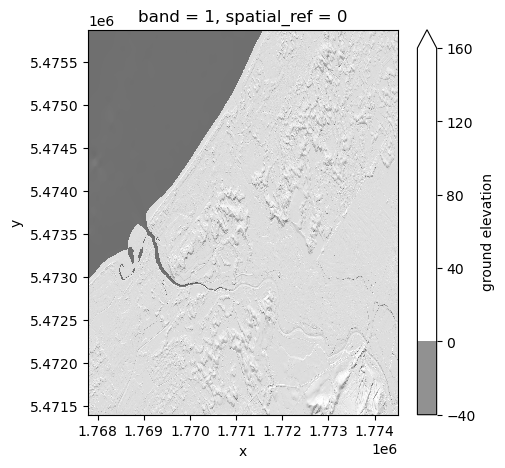

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
cmap = plt.cm.gist_gray
bound = np.arange(-40, 171, 40)
norm = mpl.colors.BoundaryNorm(
    bound, cmap.N
)
ds.plot(cmap=cmap, alpha=.43, levels=bound, ax=ax, zorder=1, add_colorbar=True, norm=norm)
terrain_data.plot(ax=ax, cmap=plt.get_cmap('gist_gray'), add_colorbar=False, alpha=1, zorder=0)

#### Plotting DEM hillshade

In [6]:
# fig, ax = plt.subplots(figsize=(12, 8), squeeze=True)

# fsize = 5

# cmap = plt.cm.gist_gray
# cmaplist = [cmap(i) for i in range(cmap.N)]
# cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# bound = np.arange(-40, 171, 40)
# norm = mpl.colors.BoundaryNorm(
#     bound, cmap.N
# )

# # Terrain
# ds.plot(ax=ax, cmap=cmap, alpha=.25, zorder=1, add_colorbar=False, norm=norm)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='3%', pad=.2)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm,
#                                spacing='proportional', ticks=bound, boundaries=bound, format="%1i", alpha=.48)
# cb.ax.tick_params(labelsize=25)
# cb.ax.set_ylabel("Elevation (m)", rotation=270, fontsize=29, labelpad=30)
# terrain_data.plot(ax=ax, cmap=plt.get_cmap('gist_gray'), add_colorbar=False, zorder=0)


# # Map
# ctx.add_basemap(
#     ax=ax, crs=2193,
#     source='https://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{z}/{y}/{x}',
#     alpha=0.1, zorder=1
# )


# ax.set_xticks([])
# ax.set_yticks([])
# ax.set(xlabel=None, ylabel=None, title=None)

# # Rotate the y tick labels
# plt.draw()
# setp(ax.get_yticklabels(), rotation=90, ha='center', rotation_mode="anchor")


# # Save figure
# fig.savefig(
#     fr"{main_dir}\waikanae_hillshade_{no_hillshade}.png",
#     bbox_inches='tight', dpi=400
# )

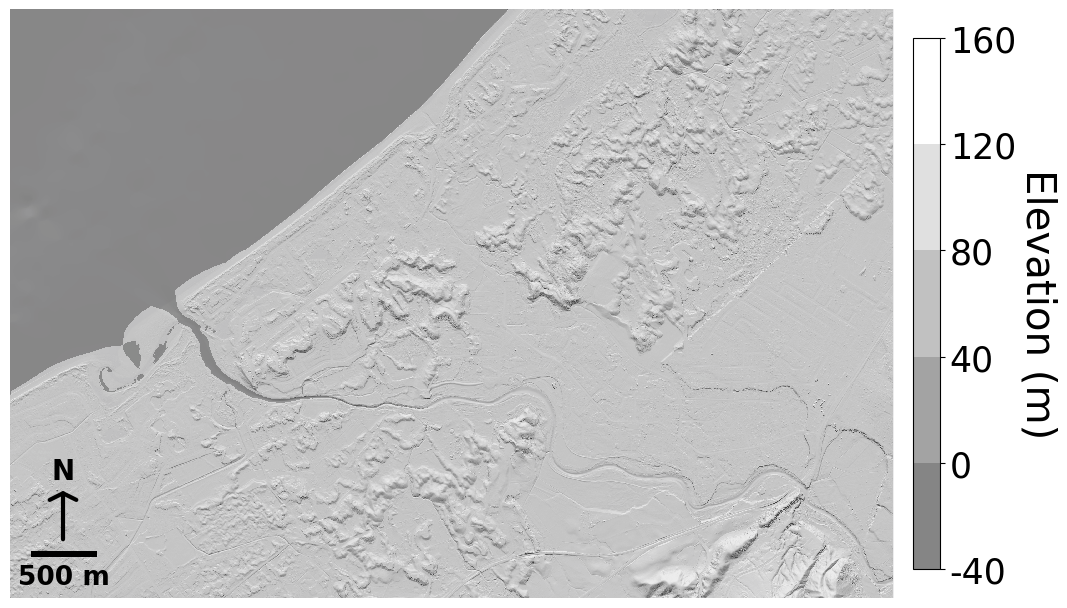

In [19]:
fig, ax = plt.subplots(figsize=(12, 8), squeeze=True)

fsize = 5

cmap = plt.cm.gist_gray
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bound = np.arange(-40, 171, 40)
norm = mpl.colors.BoundaryNorm(
    bound, cmap.N
)

# Terrain
ds.plot(ax=ax, cmap=cmap, alpha=.25, zorder=1, add_colorbar=False, norm=norm)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=.2)

# Ref: https://github.com/SHTOOLS/SHTOOLS/issues/272
cax.set_visible(False)
iax = inset_axes(cax, width='100%', height='90%', loc='center left', borderpad=0)
cb = mpl.colorbar.ColorbarBase(iax, cmap=cmap, norm=norm,
                               spacing='proportional', ticks=bound, boundaries=bound, format="%1i", alpha=.48)
cb.ax.tick_params(labelsize=25)
cb.ax.set_ylabel("Elevation (m)", rotation=270, fontsize=29, labelpad=30)
terrain_data.plot(ax=ax, cmap=plt.get_cmap('gist_gray'), add_colorbar=False, zorder=0)


# Map
ctx.add_basemap(
    ax=ax, crs=2193,
    source='https://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{z}/{y}/{x}',
    alpha=0.1, zorder=1
)


ax.set_xticks([])
ax.set_yticks([])
ax.set(xlabel=None, ylabel=None, title=None)

# Rotate the y tick labels
plt.draw()
setp(ax.get_yticklabels(), rotation=90, ha='center', rotation_mode="anchor")


# Add scale bar
ax.add_artist(ScaleBar(
    1,
    font_properties={'weight': 'bold', 'size': fsize+14},
    pad=0.5,
    length_fraction=0.1,
    box_color=None,
    box_alpha=0,
    color='black',
    scale_formatter=lambda value, unit: f'{value} {unit}',
    location="lower left"
))


# Add arrow
x_arrow, y_arrow, arrow_length = 0.06, 0.095, 0.12
ax.annotate(
    'N', fontweight='bold', color='black',
    xy=(x_arrow, y_arrow),
    xytext=(x_arrow, y_arrow+arrow_length),
    arrowprops=dict(arrowstyle='<-, head_width=0.8', facecolor='black', edgecolor='black', linewidth=3,
                    mutation_scale=12),
    ha='center', va='center', fontsize=fsize+15,
    xycoords=ax.transAxes, zorder=4
)

#remove frame from each side of plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# Save figure
fig.savefig(
    fr"{main_dir}\waikanae_hillshade_{no_hillshade}.jpg",
    bbox_inches='tight', dpi=600
)